In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [137]:
database = pd.read_csv("persons_pics_train.csv")

In [138]:
num_unique_people = database['label'].nunique()
print(num_unique_people)

12


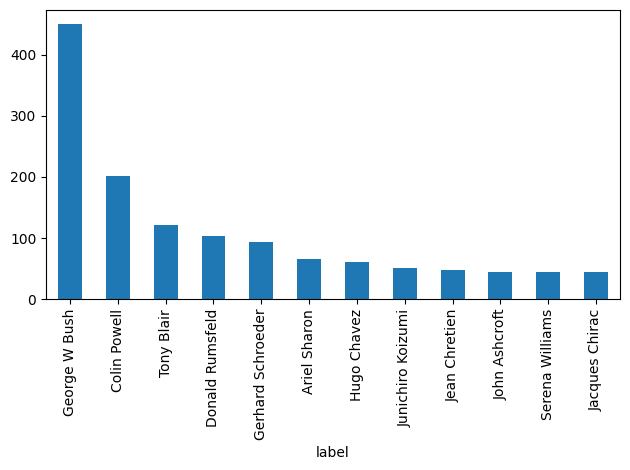

0.07013574660633484


In [139]:
database['label'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.show()

total_samples = len(database)
gerhard_schroeder_samples = database['label'].value_counts()['Gerhard Schroeder']
gerhard_schroeder_fraction = gerhard_schroeder_samples / total_samples

print(gerhard_schroeder_fraction)

In [140]:
mean_vectors = database.groupby('label').mean()

gerhard_schroeder_vector = mean_vectors.loc['Gerhard Schroeder']
gerhard_schroeder_coordinate = gerhard_schroeder_vector[0]
print(gerhard_schroeder_coordinate)

0.21016234977419354


/tmp/ipykernel_2363/2520098181.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gerhard_schroeder_coordinate = gerhard_schroeder_vector[0]


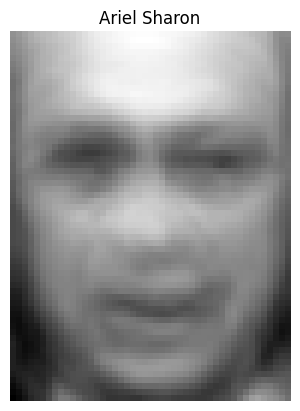

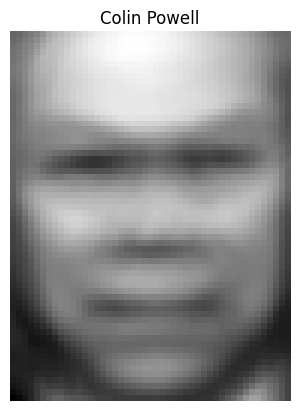

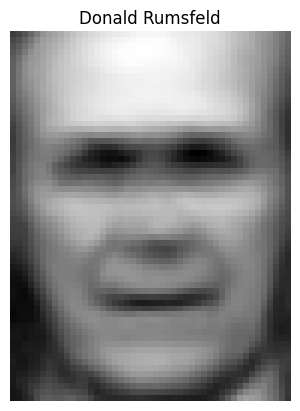

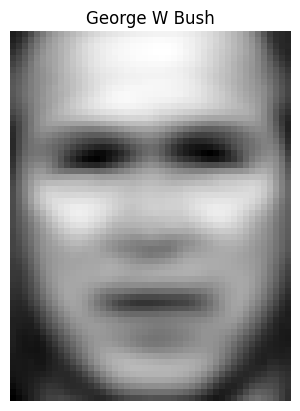

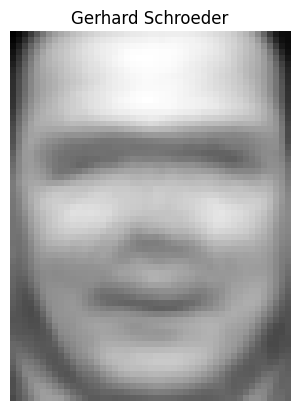

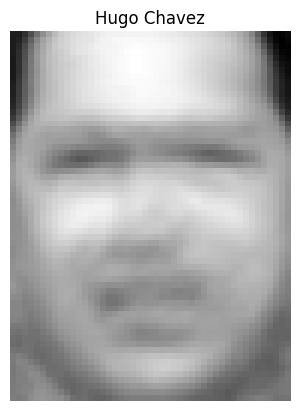

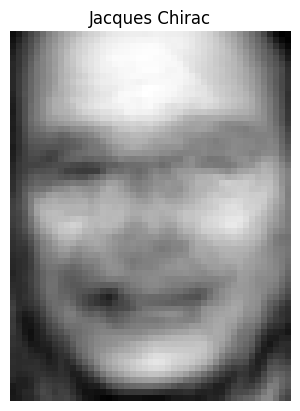

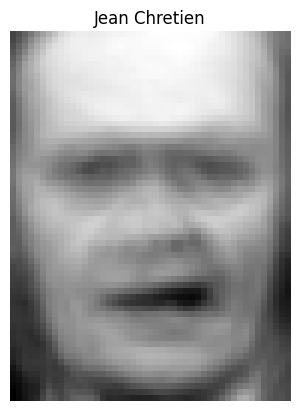

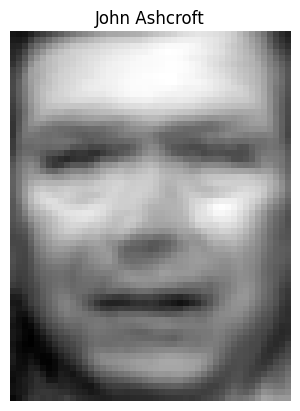

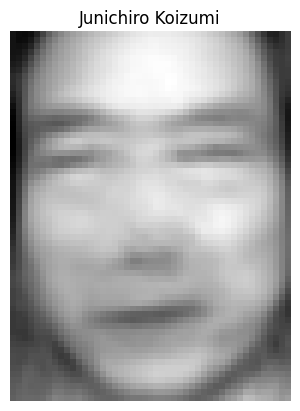

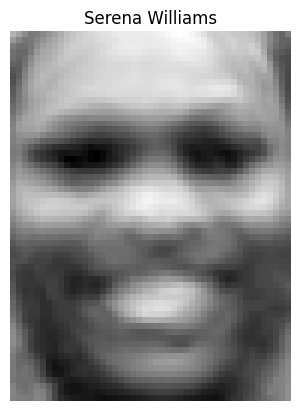

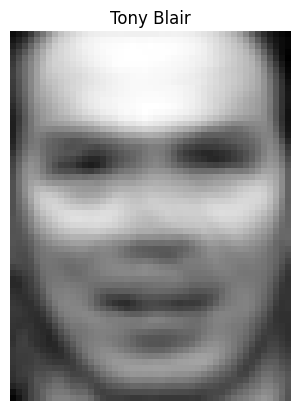

In [141]:
for label, mean_vector in mean_vectors.iterrows():
    image = np.array(mean_vector).reshape(62, 47)
    
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')
    plt.show()

In [142]:
similarity_matrix = cosine_similarity(mean_vectors)
gerhard_schroeder_index = mean_vectors.index.get_loc('Gerhard Schroeder')
hugo_chavez_index = mean_vectors.index.get_loc('Hugo Chavez')
cosine_similarity_value = similarity_matrix[gerhard_schroeder_index, hugo_chavez_index]

print(cosine_similarity_value)


0.9976209981219301


In [143]:
from sklearn.svm import SVC
X = database.drop(columns=['label'])
y = database['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)

model = SVC(kernel='linear', random_state=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score на тестовых данных:", f1)



F1-score на тестовых данных: 0.7414860718599269


In [144]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
                     'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000], 
                     'class_weight': [None, 'balanced'], 
                     'random_state':[7]}]
cv = GridSearchCV(SVC(), tuned_parameters, refit=True, verbose=3)
cv.fit(X, y)

best_params = cv.best_params_
print(best_params)

best_model = cv.best_estimator_

y_pred = best_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)


Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.805 total time=   1.2s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.808 total time=   1.1s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.808 total time=   1.1s
[CV 4/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.789 total time=   1.1s
[CV 5/5] END C=1, class_weight=None, gamma=0.001, kernel=linear, random_state=7;, score=0.796 total time=   1.1s
[CV 1/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=7;, score=0.395 total time=   1.5s
[CV 2/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=7;, score=0.385 total time=   1.6s
[CV 3/5] END C=1, class_weight=None, gamma=0.001, kernel=poly, random_state=7;, score=0.370 total time=   1.5s
[CV 4/5] END C=1, class_weight=None, gam

In [145]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='full')
pca.fit(X)
explained_variance_ratio_cumulative = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(explained_variance_ratio_cumulative > 0.95) + 1
print(num_components)

181
